# Sequential Dense
---

## 00. Imports

In [1]:
import os
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid")

In [2]:
import sys
sys.path.append("../")

In [3]:
from src.activation.relu import ReluLayer
from src.layers.dense import DenseLayer
from src.model.sequential import SequentialModel
from src.utils.core import convert_categorical2one_hot

## 01. Settings

In [4]:
# number of samples in the data set
N_SAMPLES = 2000
# number of classes
N_CLASSES = 6
# number of features
N_FEATURES = 2
# ratio between training and test sets
TEST_SIZE = 0.1

## 02. Supporting functions

In [5]:
# the function making up the graph of a dataset
def make_plot(X, y, plot_name, file_name=None, XX=None, YY=None, preds=None, dark=False):
    if (dark):
        plt.style.use('dark_background')
    else:
        sns.set_style("whitegrid")
    plt.figure(figsize=(16,12))
    axes = plt.gca()
    axes.set(xlabel="$X_1$", ylabel="$X_2$")
    plt.title(plot_name, fontsize=30)
    plt.subplots_adjust(left=0.20)
    plt.subplots_adjust(right=0.80)
    if(XX is not None and YY is not None and preds is not None):
        plt.contourf(XX, YY, preds.reshape(XX.shape), 25, alpha = 1, cmap=cm.Spectral)
        plt.contour(XX, YY, preds.reshape(XX.shape), levels=[.5], cmap="Greys", vmin=0, vmax=.6)
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), s=40, cmap=plt.cm.Spectral, edgecolors='black')
    if(file_name):
        plt.savefig(file_name)
        plt.close()

## 03. Build data set

In [6]:
X, y = make_blobs(
    n_samples = N_SAMPLES,
    n_features = N_FEATURES,
    centers = N_CLASSES,
    cluster_std = 1.2,
    random_state=50
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=42)
y_train = convert_categorical2one_hot(y_train)
y_test = convert_categorical2one_hot(y_test)

print(f"X shape: {X.shape}, y: {y.shape}")

X shape: (2000, 2), y: (2000,)


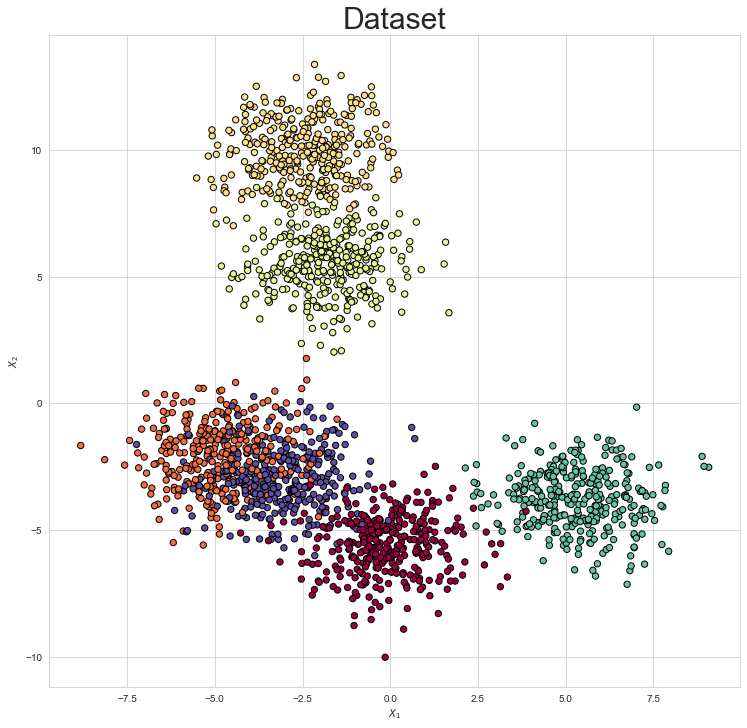

In [7]:
make_plot(X, y, "Dataset")

## 04. Build model

In [8]:
layers = [
    DenseLayer.initialize(input_dim=N_FEATURES, output_dim=25),
    ReluLayer(),
    DenseLayer.initialize(input_dim=25, output_dim=50),
    ReluLayer(),
    DenseLayer.initialize(input_dim=50, output_dim=50),
    ReluLayer(),
    DenseLayer.initialize(input_dim=50, output_dim=50),
    ReluLayer(),
    DenseLayer.initialize(input_dim=50, output_dim=25),
    ReluLayer(),
    DenseLayer.initialize(input_dim=25, output_dim=N_CLASSES)
]

model = SequentialModel(layers=layers)

In [9]:
model.train(
    x_train=np.transpose(X_train), 
    y_train=np.transpose(y_train), 
    x_test=np.transpose(X_test), 
    y_test=np.transpose(y_test), 
    epochs=200, 
    lr=0.005
)

Iteration: 00000 - cost: 11.46514 - accuracy: 0.19000
Iteration: 00010 - cost: 11.38338 - accuracy: 0.19000
Iteration: 00020 - cost: 6.14757 - accuracy: 0.30000
Iteration: 00030 - cost: 2.33015 - accuracy: 0.35500
Iteration: 00040 - cost: 1.45393 - accuracy: 0.41500
Iteration: 00050 - cost: 0.88667 - accuracy: 0.54500
Iteration: 00060 - cost: 0.54099 - accuracy: 0.58000
Iteration: 00070 - cost: 0.24564 - accuracy: 0.69000
Iteration: 00080 - cost: 0.02879 - accuracy: 0.80000
Iteration: 00090 - cost: 0.00000 - accuracy: 0.81500
Iteration: 00100 - cost: 0.00000 - accuracy: 0.85500
Iteration: 00110 - cost: 0.00000 - accuracy: 0.87000
Iteration: 00120 - cost: 0.00000 - accuracy: 0.88500
Iteration: 00130 - cost: 0.00000 - accuracy: 0.88500
Iteration: 00140 - cost: 0.00000 - accuracy: 0.90500
Iteration: 00150 - cost: 0.00000 - accuracy: 0.91000
Iteration: 00160 - cost: 0.00000 - accuracy: 0.91500
Iteration: 00170 - cost: 0.00000 - accuracy: 0.91500
Iteration: 00180 - cost: 0.00000 - accuracy:

In [11]:
model.predict(x=np.transpose(X_test))

array([[  8.29034333,   8.59546668,  10.94712492, ...,   4.198144  ,
         11.14047361, -25.48771741],
       [ -0.61286501,   3.71703997,   0.07332208, ...,  -3.78783481,
          1.41322359,   5.34710116],
       [-12.28520847, -14.69248442, -15.24129487, ..., -10.35993341,
        -16.14133906,  19.94010655],
       [ -2.82039378,  -2.07789429,  -3.75531762, ...,  -1.28800347,
         -3.65055672,  16.44567205],
       [  5.03511782,  -0.40565201,   4.34109649, ...,  12.21883205,
          2.7332641 , -12.11747152],
       [  5.14855687,   8.33921487,   6.9935734 , ...,   2.2127745 ,
          8.0497561 ,  -4.16845499]])